In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("data/daily-min-temperatures.csv")

In [88]:
df["Date"] = pd.to_datetime(df["Date"])

In [89]:
df.set_index("Date", inplace=True)

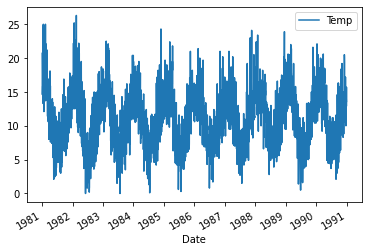

In [90]:
df.plot()
plt.show()

Differencing on daily basis (not leap year friendly)

In [91]:
X = df.values
differences = []
days_in_year = 365

for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    differences.append(value)

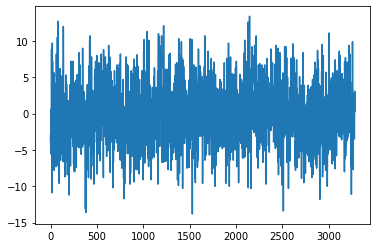

In [92]:
plt.plot(differences)
plt.show()

Monthly level resampling and differencing

In [93]:
monthly_df = df.resample("M").mean()

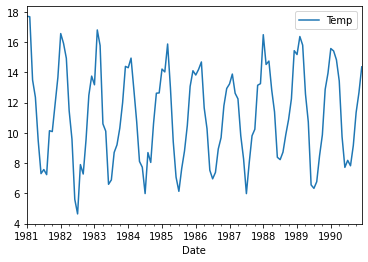

In [94]:
monthly_df.plot()
plt.show()

In [95]:
X = monthly_df.values
differences = []
months_in_year = 12

for i in range(months_in_year, len(X)):
    value = X[i] - X[i - months_in_year]
    differences.append(value)

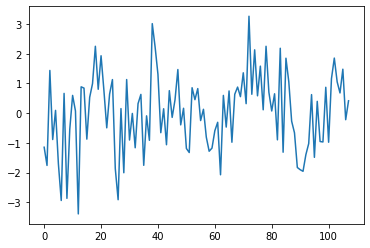

In [96]:
plt.plot(differences)
plt.show()

Using the monthly average minimum temperatures differencing to adjust the daily minimum temperatures dataset

In [97]:
monthly_df.reset_index(inplace=True, drop=False)
monthly_df["month_year"] = monthly_df.Date.dt.to_period("M")
monthly_df.set_index("month_year", inplace=True)
monthly_df.drop("Date", axis=1, inplace=True)

In [117]:
df.reset_index(inplace=True, drop=False)

In [122]:
X = df.values
differences = []
days_in_year = 365

for i in range(days_in_year, len(X)):
    month_year = X[i][0].to_period("M")
    temp = X[i][1]
    average_temp_last_year = monthly_df.loc[month_year, "Temp"]
    differences.append(temp - average_temp_last_year)

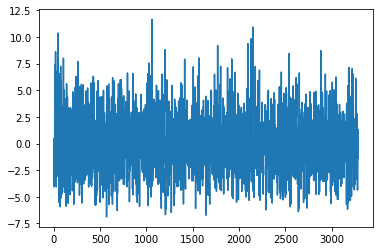

In [123]:
plt.plot(differences)
plt.show()